In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
print(f"{iris_data.feature_names}")
print(f"{iris_data.target_names}")
print(f"{iris_data.data.shape}")
print(f"{iris_data.target.shape}")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [3]:
import pandas as pd
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["label"] = iris_data.target
label_map = {i: name for i, name in enumerate(iris_data.target_names)}
df["species"] = df["label"].map(label_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
import plotly.express as px
fig = px.scatter(
    df,
    x="petal length (cm)",
    y="petal width (cm)",
    color="species",
    title="Iris: 꽃잎 길이 대 너비"
)
fig.show()

In [6]:
fig = px.histogram(
    df,
    x="sepal length (cm)",
    color = "species",
    barmode="overlay",
    nbins=20,
    title="Iris"
)
fig.update_traces(opacity=0.6)
fig.show()

C:\Users\lizzy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.

C:\Users\lizzy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.

C:\Users\lizzy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.

C:\Users\lizzy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.

C:\Users\lizzy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.



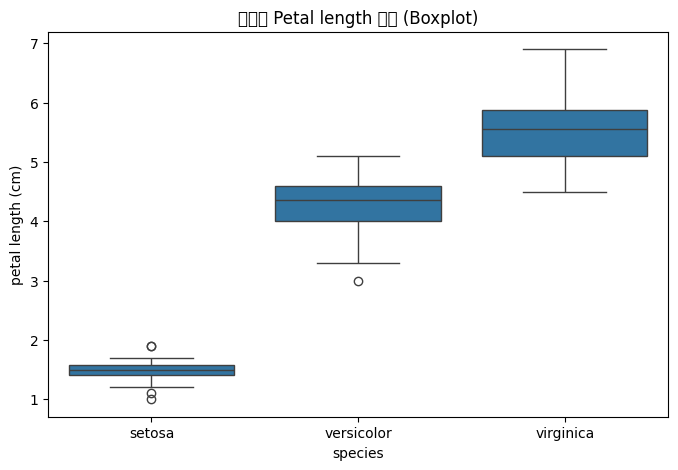

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="species", y="petal length (cm)")
plt.title("품종별 Petal length 분포 (Boxplot)")
plt.show()

In [9]:
import plotly.express as px
group_means = df.groupby("species")[iris_data.feature_names].mean()

fig = px.imshow(
    group_means,
    text_auto = True,
    aspect="auto",
    color_continuous_scale="Blues",
    title="품종별 평균 특성 (Heatmap)"

)
fig.update_xaxes(title="특성(feature)")
fig.update_yaxes(title="품종(species)")

fig.show()